IMPORTING THE REQUIRED LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

LOADING AND SPLITTING DATA

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
print("Training Images: {}".format(x_train.shape))
print("Testing Images: {}".format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(x_train[0].shape)

(32, 32, 3)


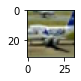

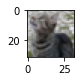

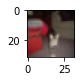

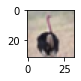

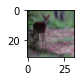

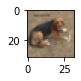

In [5]:
for i in range(332,338):
  plt.subplot(120+ 1+i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING THE DATA

In [6]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
n_classes=10

print("shape before one-hot encoding ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after one-hot encoding ",y_train.shape)


shape before one-hot encoding  (50000, 1)
shape after one-hot encoding  (50000, 10)


BUILDING THE MODEL

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

model=Sequential()

# convolutional layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.nn.relu,input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(200,activation=tf.nn.relu))
model.add(Dropout(0.25))
model.add(Dense(100,activation=tf.nn.relu))
model.add(Dropout(0.25))

# output layer
model.add(Dense(10,activation=tf.nn.softmax))

COMPILING THE MODEL

In [20]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

TRAINING THE MODEL

In [21]:
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
391/391 [==============================] - 527s 1s/step - loss: 1.6195 - accuracy: 0.4033 - val_loss: 1.2084 - val_accuracy: 0.5720
Epoch 2/20
391/391 [==============================] - 528s 1s/step - loss: 1.1809 - accuracy: 0.5821 - val_loss: 0.9538 - val_accuracy: 0.6653
Epoch 3/20
391/391 [==============================] - 524s 1s/step - loss: 0.9839 - accuracy: 0.6577 - val_loss: 0.8653 - val_accuracy: 0.7028
Epoch 4/20
391/391 [==============================] - 529s 1s/step - loss: 0.8726 - accuracy: 0.6956 - val_loss: 0.8178 - val_accuracy: 0.7160
Epoch 5/20
391/391 [==============================] - 523s 1s/step - loss: 0.7868 - accuracy: 0.7255 - val_loss: 0.7756 - val_accuracy: 0.7324
Epoch 6/20
391/391 [==============================] - 524s 1s/step - loss: 0.7259 - accuracy: 0.7468 - val_loss: 0.7286 - val_accuracy: 0.7501
Epoch 7/20
391/391 [==============================] - 525s 1s/step - loss: 0.6748 - accuracy: 0.7636 - val_loss: 0.7200 - val_accuracy: 0.7558

PREDICTING

In [22]:
classes=range(0,10)
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# zip the classes and names to create a dictionary class_labels 
class_labels=dict(zip(classes,names))

# generate batch of 9 images to predict
batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

# make predictions
prediction=model.predict(batch,verbose=1)


1/1 [==============================] - 0s 98ms/step


In [23]:
print(prediction)

[[1.69751129e-05 6.86276223e-07 4.17454913e-02 1.84800662e-03
  7.99011469e-01 3.24616246e-02 5.17191365e-04 1.24393009e-01
  3.56723194e-06 1.94229870e-06]
 [2.08866317e-04 2.11390343e-05 1.00010097e-01 1.04827926e-01
  6.04583416e-03 6.61183298e-01 7.78149115e-03 1.19782999e-01
  7.31424952e-05 6.51759983e-05]
 [1.19199774e-06 8.15859494e-07 1.23004057e-02 1.23716693e-03
  9.60035832e-05 1.97698711e-04 9.86152411e-01 1.35968430e-05
  5.18410445e-07 2.02502136e-07]
 [1.46931768e-06 6.94990332e-09 3.65444022e-04 9.75170970e-01
  5.49509597e-04 4.31358843e-04 2.34555379e-02 6.70112922e-06
  1.71124884e-05 1.84234489e-06]
 [2.80587065e-09 9.99999285e-01 7.00032073e-16 1.32285913e-16
  1.51993621e-18 5.31637768e-20 4.17585893e-16 9.13944315e-16
  3.58487455e-07 3.19690571e-07]
 [5.30680166e-10 9.99999523e-01 1.70747516e-09 3.15197417e-11
  1.46464120e-15 5.44747786e-13 5.69745195e-10 1.07328959e-14
  2.23876015e-07 3.08168552e-07]
 [6.32150704e-03 7.90857535e-04 3.94640826e-02 5.40766001e

In [24]:
for image in prediction:
  print(np.sum(image))

1.0
0.9999999
1.0
0.99999994
0.99999994
1.0000001
1.0
1.0000001
1.0


In [25]:
class_result=np.argmax(prediction,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION

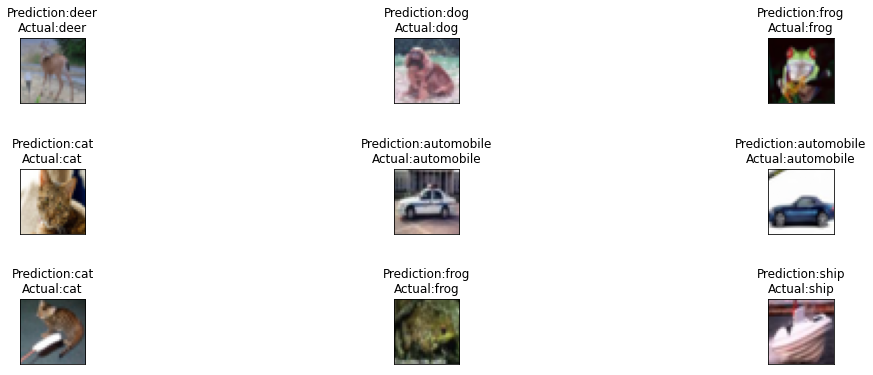

In [26]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title="Prediction:{}\nActual:{}".format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # plot the image
  axs[i].imshow(img)

# show the image
plt.show()
